In [2]:

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [78]:
# не знам как да си сменя името на ноутбука... Задание 1 71607
full_batch = pd.read_csv("voice.csv")

In [79]:
print('batch:', full_batch.shape)

batch: (3168, 21)


In [80]:
full_batch.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [81]:
full_batch.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [82]:
# в този момент отворих .svc-то с openoffice да прегледам за всеки случай. Нямам категорни данни никъде освбен в У,
# където са MALE/FEMALE обръщам ги в 1/0

In [83]:
full_batch.isnull().sum().sort_values()



meanfreq    0
dfrange     0
maxdom      0
mindom      0
meandom     0
maxfun      0
minfun      0
meanfun     0
centroid    0
modindx     0
mode        0
sp.ent      0
kurt        0
skew        0
IQR         0
Q75         0
Q25         0
median      0
sd          0
sfm         0
label       0
dtype: int64

In [84]:
# супер няма празни полета, вохоо

In [85]:
full_batch.dtypes()

TypeError: 'Series' object is not callable

In [86]:
full_batch.describe()



,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [87]:
full_batch["label"]

0         male
1         male
2         male
3         male
4         male
5         male
6         male
7         male
8         male
9         male
10        male
11        male
12        male
13        male
14        male
15        male
16        male
17        male
18        male
19        male
20        male
21        male
22        male
23        male
24        male
25        male
26        male
27        male
28        male
29        male
         ...  
3138    female
3139    female
3140    female
3141    female
3142    female
3143    female
3144    female
3145    female
3146    female
3147    female
3148    female
3149    female
3150    female
3151    female
3152    female
3153    female
3154    female
3155    female
3156    female
3157    female
3158    female
3159    female
3160    female
3161    female
3162    female
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [88]:
full_batch["label"] = full_batch["label"].map({'male': 1, 'female': 0})

In [89]:
full_batch["label"]


0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3138    0
3139    0
3140    0
3141    0
3142    0
3143    0
3144    0
3145    0
3146    0
3147    0
3148    0
3149    0
3150    0
3151    0
3152    0
3153    0
3154    0
3155    0
3156    0
3157    0
3158    0
3159    0
3160    0
3161    0
3162    0
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [90]:
full_batch["label"].value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');

In [91]:
#нещо не стана, графиката. нема ерори нема ексепшъни, ама и картинка нема...

In [92]:
#приемам че не са 50/50 

In [93]:
full_batch["label"].value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [94]:
# я 50/50 са

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
Y = full_batch["label"]

In [97]:
X = full_batch.drop(labels=["label"],  axis = 1)

In [98]:
Y

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
3138    0
3139    0
3140    0
3141    0
3142    0
3143    0
3144    0
3145    0
3146    0
3147    0
3148    0
3149    0
3150    0
3151    0
3152    0
3153    0
3154    0
3155    0
3156    0
3157    0
3158    0
3159    0
3160    0
3161    0
3162    0
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [99]:
X.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920


In [100]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0,  stratify=Y)

In [101]:
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(2376, 20)
(792, 20)
(2376,)
(792,)


In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))


train score: 0.907828282828
test score:  0.92297979798


In [103]:
# леко ъндърфитна(БГ-майчин)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
from sklearn.svm import SVC

model = SVC().fit(x_train, y_train)
model.score(x_test, y_test)

0.74116161616161613

In [106]:
model = SVC().fit(x_train, y_train)
model.score(x_train, y_train)

0.7512626262626263

In [107]:
model = LogisticRegression().fit(x_train, y_train)
print("train score:", model.score(x_train, y_train))
print("test score: ", model.score(x_test, y_test))
predictions = model.predict(x_train)

train score: 0.907828282828
test score:  0.92297979798


In [108]:
import seaborn as sns
sns.distplot(predictions)

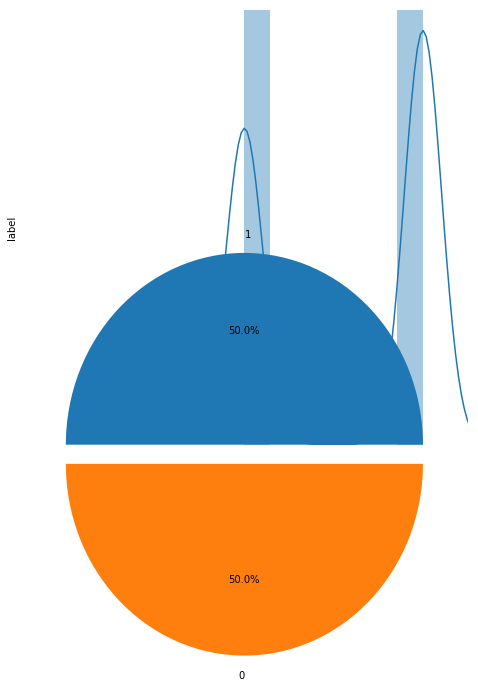

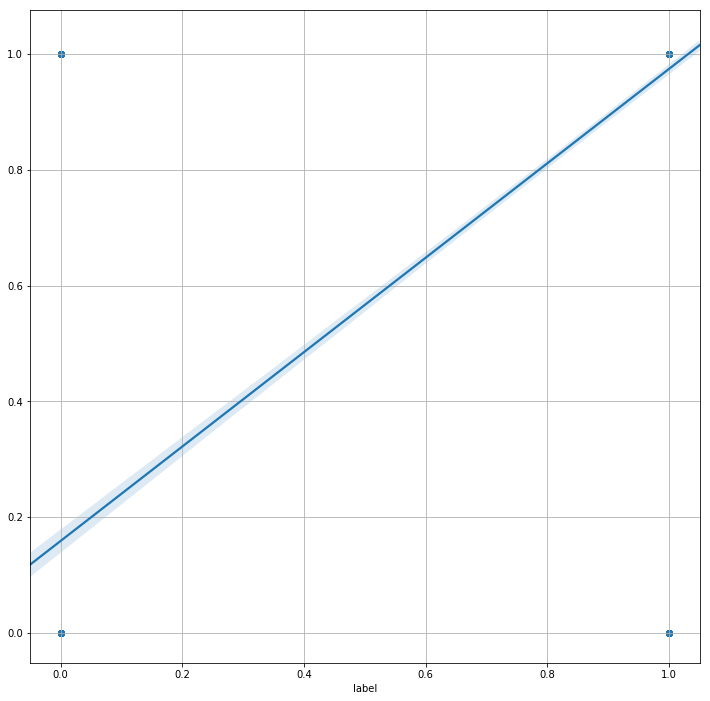

In [109]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()


In [110]:
# нямам идея какво стана

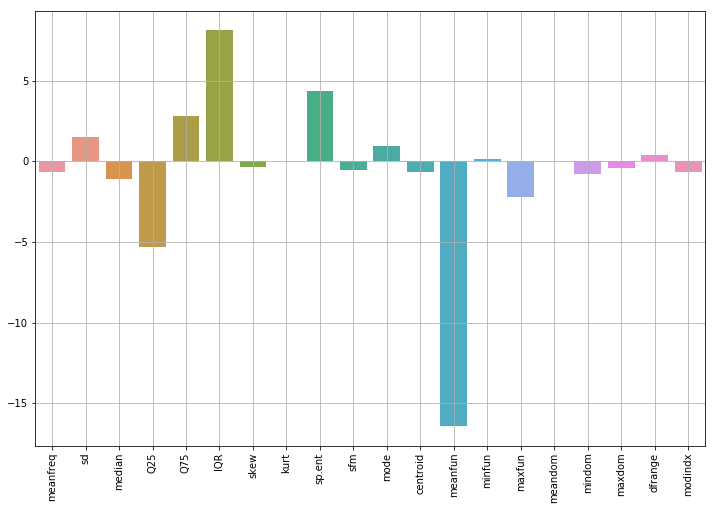

In [111]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)
    plt.show()




logistic_regression_features(X, model)

In [112]:
new_x = full_batch[['sd', 'median', 'Q25', 'Q75', 'IQR', 'sp.ent', 'meanfun', 'maxfun']]

In [113]:
new_x.head(25)

,sd,median,Q25,Q75,IQR,sp.ent,meanfun,maxfun
0,0.064241,0.032027,0.015071,0.090193,0.075122,0.893369,0.084279,0.275862
1,0.067310,0.040229,0.019414,0.092666,0.073252,0.892193,0.107937,0.250000
2,0.083829,0.036718,0.008701,0.131908,0.123207,0.846389,0.098706,0.271186
3,0.072111,0.158011,0.096582,0.207955,0.111374,0.963322,0.088965,0.250000
4,0.079146,0.124656,0.078720,0.206045,0.127325,0.971955,0.106398,0.266667
5,0.079557,0.119090,0.067958,0.209592,0.141634,0.963181,0.110132,0.253968
6,0.074463,0.160106,0.092899,0.205718,0.112819,0.967573,0.105945,0.266667
7,0.076767,0.144337,0.110532,0.231962,0.121430,0.959255,0.093052,0.144144
8,0.078018,0.138587,0.088206,0.208587,0.120381,0.970723,0.096729,0.250000
9,0.080350,0.121451,0.075580,0.201957,0.126377,0.975246,0.105881,0.262295


In [114]:
x_train, x_test, y_train, y_test = train_test_split(new_x, Y, random_state=0,  stratify=Y)

In [115]:
new_model = LogisticRegression().fit(x_train, y_train)
print("train score:", new_model.score(x_train, y_train))
print("test score: ", new_model.score(x_test, y_test))

train score: 0.911616161616
test score:  0.915404040404


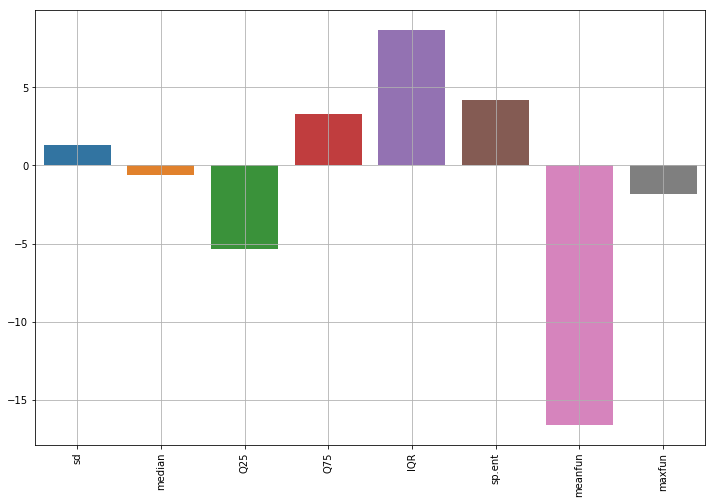

In [116]:
logistic_regression_features(new_x, new_model)

In [117]:
new_x = full_batch[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']]

# премахвам тези с най голяма тежест IQR meanfun, да видя какво ще стане

In [118]:
x_train, x_test, y_train, y_test = train_test_split(new_x, Y, random_state=0,  stratify=Y)

new_model = LogisticRegression().fit(x_train, y_train)
print("train score:", new_model.score(x_train, y_train))
print("test score: ", new_model.score(x_test, y_test))

train score: 1.0
test score:  1.0


In [119]:
# втф...